# Лабораторная работа №4

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Изучение алгоритмов и методов кластеризации на практике.

## Индивидуальное задание

Вариант 2 <br>
Набор данных 2liver.csv <br>
Содержит информацию о заболеваемости печени: Возраст пациента, Пол пациента, Общий билирубин, Прямой билирубин, Щелочная фосфатаза, Аламиноаминотрансфераза, Аспартатаминотрансфераза, Всего белков, Альбумин, Соотношение альбуминов и глобулинов, Цель: *поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).*

## Ход работы

### Часть 1

Для начала была добавлена функция для создания набора данных.    
    **Параметры:**    
    `n` - число объектов в каждой группе <br>
    `seed` - зерно, необходимое для воспроизводимости случайных значений.

In [10]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)
    
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

В результате применения данной функции были сформированы датафреймы `train` и `test`, содержащий заданное число объектов в каждой группе (всего 3 группы) с двумя признаками: `x` и `y`. Для тренировочного набора данных были взяты параметры: `n` - 30, `seed` - 96, а для тестеровочных данных: `n` - 69, `seed` - 100.

In [11]:
df_train = make_data(30, 96)
df_test = make_data(69, 100)

Далее была проведена стандартизация данных. Стандартизация преобразует данные таким образом, что их математическое ожидание равно 0, а стандартное отклонение равно 1. Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного нормального распределения, что позволяет минимизировать среднеквадратичную ошибку. Для стандартизации в `python` использовалась структура `StandardScaler`.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
train_scaled = scaler.fit_transform(df_train) 
test_scaled = scaler.fit_transform(df_test) 

Также с помощью метода `.fit_predict` обучена модель для кластеризации методом `Kmeans` для трёх кластеров (для этого параметру `n_clusters` присваивалась 3). Выводя переменную `train_labels`, можно увидеть какой `x` принадлежит какой группе (от 0 до 2).

In [13]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
train_labels = kmeans3.fit_predict(train_scaled)
print(train_labels)

[0 1 2 2 1 0 2 2 0 2 1 1 0 0 2 2 1 0 1 0 2 2 1 2 0 0 0 2 0 2 1 2 2 0 2 1 1
 0 0 2 2 2 1 2 0 1 1 0 1 1 0 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 1 1 0 0 0 2 1 0
 1 0 0 0 0 2 1 0 2 2 2 0 0 2 2 0]


Была проведена визуализация кластеров с помощью `scatter`, каждый кластер имеет свой цвет и у каждого кластера центры были помечены крестом.

Text(0, 0.5, 'y')

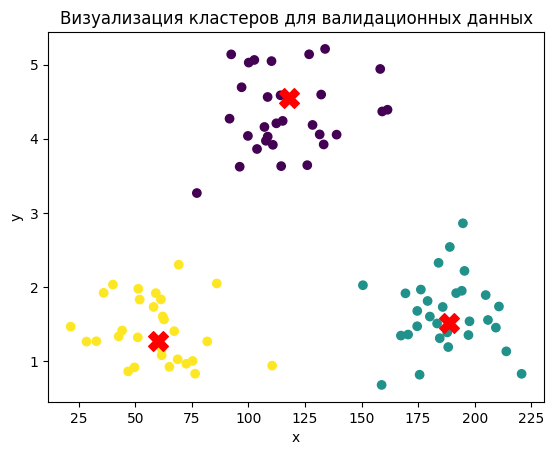

In [14]:
import matplotlib.pyplot as plt
centers = scaler.inverse_transform(kmeans3.cluster_centers_)

plt.scatter(df_train['x'], df_train['y'], c=train_labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров для валидационных данных')
plt.xlabel('x')
plt.ylabel('y')

Из данного графика видно, что было выбрано оптимальное количество групп кластеризации. Все группы кучкуются в относительной близости.

Также на основе предыдущих лабораторных работах было выполнение предсказание, используя данные `test`. Визуализация была выполнена таким же способом, что и в прошлом задании.

Text(0, 0.5, 'y')

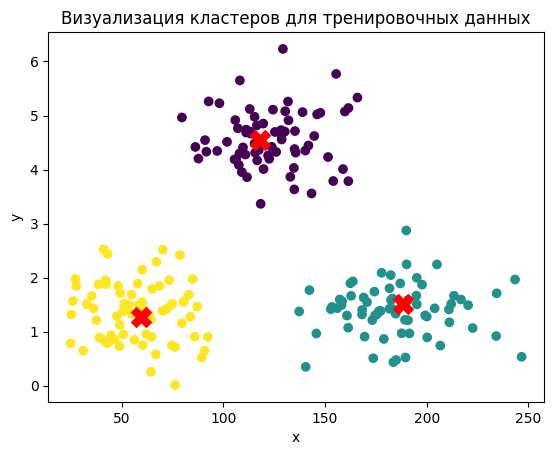

In [15]:
test_labels3 = kmeans3.predict(test_scaled)

centers = scaler.inverse_transform(kmeans3.cluster_centers_)

plt.scatter(df_test['x'], df_test['y'], c=test_labels3, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров для тренировочных данных')
plt.xlabel('x')
plt.ylabel('y')

Из данного графика можно сказать, что при предсказании не произошло отклонение от исходных групп кластеризации. Прогнозируемые точки также кучкуются в трех местах и не наблюдается выбросов, залезающих в другие группы. 

Также были посчитаны коэффициенты силуэта выборки. Силуэт выборки – средняя величина силуэта объектов данной выборки, силуэт показывает, насколько хорошо была выполнена кластеризация, данный показатель находится в диапазоне от -1 до +1, при этом оценка около 0 указывает на перекрывающиеся кластеры. Для этого использовалась библиотека  `sklearn.metrics` и ее метод `silhouette_score`. 

In [16]:
from sklearn.metrics import silhouette_score

silhouette_train = silhouette_score(train_scaled, train_labels)
silhouette_test = silhouette_score(test_scaled, test_labels3)
print(f"Silhouette Score (Train): {silhouette_train}")
print(f"Silhouette Score (Test): {silhouette_test}")

Silhouette Score (Train): 0.7222404932214279
Silhouette Score (Test): 0.7123126820798765


Так как средняя величина силуэта объектов близка к 1, можно сказать, что кластеризация была выполнена хорошо. Также не наблюдается значительной разницы между коэффициентами тренировочным и тестируемым датафреймом. 

Все те же действия были проделаны и для кластеризации по группам равным 2 и 4 (`n_clusters`).

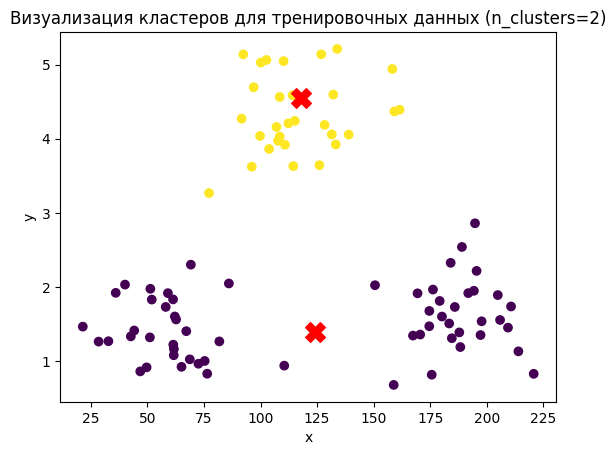

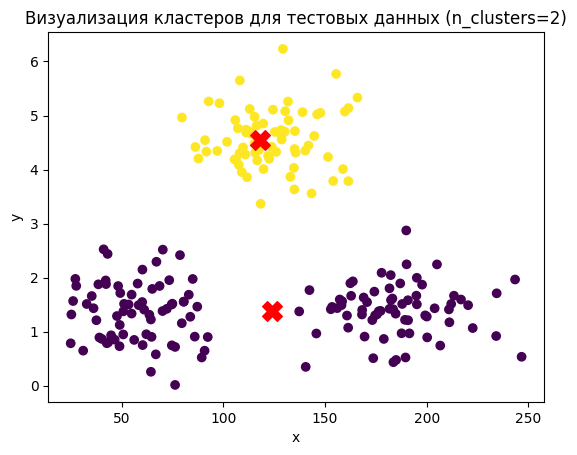

Silhouette Score (Train) для n_clusters=2: 0.48203350652636306
Silhouette Score (Test) для n_clusters=2: 0.4917529762213745


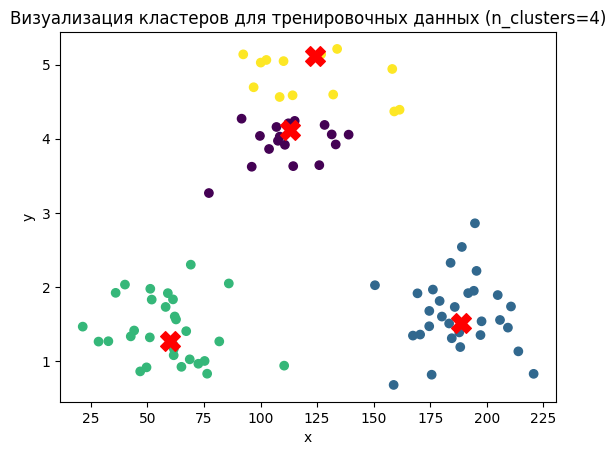

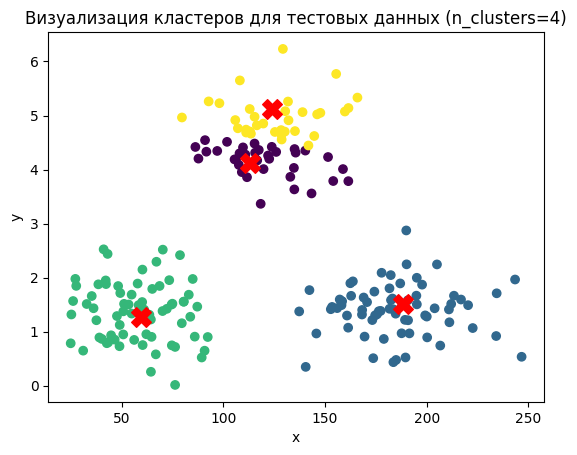

Silhouette Score (Train) для n_clusters=4: 0.6034662424708762
Silhouette Score (Test) для n_clusters=4: 0.5553586196177122


In [17]:
for n_clusters in [2, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    train_labels = kmeans.fit_predict(train_scaled)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Визуализация кластеров для тренировочных данных
    plt.scatter(df_train['x'], df_train['y'], c=train_labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title(f'Визуализация кластеров для тренировочных данных (n_clusters={n_clusters})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Предсказание на тестовых данных
    test_labels = kmeans.predict(test_scaled)

    # Визуализация кластеров для тестовых данных
    plt.scatter(df_test['x'], df_test['y'], c=test_labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title(f'Визуализация кластеров для тестовых данных (n_clusters={n_clusters})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Силуэт-анализ
    silhouette_train = silhouette_score(train_scaled, train_labels)
    silhouette_test = silhouette_score(test_scaled, test_labels)
    print(f"Silhouette Score (Train) для n_clusters={n_clusters}: {silhouette_train}")
    print(f"Silhouette Score (Test) для n_clusters={n_clusters}: {silhouette_test}")

Исходя из графиков видно, что при `n_clusters = 2` центр явно находится не по середине точек, а при `n_clusters = 4` центры находятся в одной группе. Что при `n_clusters = 2`, что при `n_clusters = 4` коэффициент силуэта стали меньше, что подтверждает менее грамотный выбор количества групп кластеризации.

Далее был построен график по “методу локтя”. Суть метода заключается в том, чтобы найти точку на графике, где изменение суммы квадратов расстояний между точками и центроидами кластеров перестает значительно меняться, для этого используется библиотека `yellowbrick.cluster` и ее класс `KElbowVisualizer`.

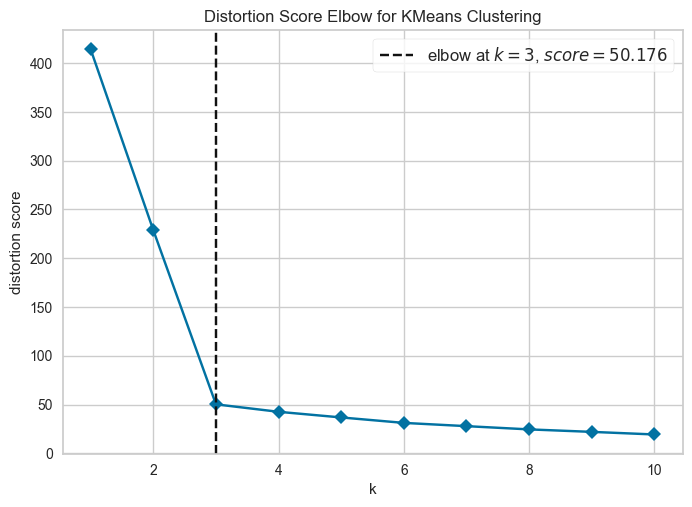

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans3, k=(1,11), timings=False)
visualizer.fit(test_scaled)
visualizer.show()

График также подтверждает, что оптимальный выбор количества групп кластеризации - 3 (пунктирная линия).

### Часть 2

Для начала был загружен датасет `2liver.csv`.

In [19]:
import pandas as pd

df = pd.read_csv("2liver.csv")
df

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.50,2
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1


Далее была проделана предобработка данных. Так были переименованы столбцы в кдиный формат.

In [20]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123']
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123'],
      dtype='object')

Далее была проведена проверка на количество строк в каждом столбце. 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Те ячейки, в которых не было данных, были заменены на среднее значение их столбцов.

In [22]:
df['Total_Bilirubin'].fillna(df['Total_Bilirubin'].mean(), inplace=True)
df['Alkaline_Phosphotase'].fillna(df['Alkaline_Phosphotase'].mean(), inplace=True)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             587 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        587 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  587 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


После была проведена проверка на наличие дубликатов. Явных дубликатов обнаружено не было.

In [23]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_123
19,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145.0,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158.0,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20,35,5.8,2.0,0.50,1


Также была проведена проверка на уникальность значений, так в столбце встречались значения "Male" и "Mal", которые были приведены в единый формат - "Male". Чтобы в дальнейшем прогнозировать данные, столбцы были приведены в бинарный вид - значения 0 и 1.

In [24]:
df['Gender'].unique()

array(['Female', 'Male', 'Mal'], dtype=object)

In [25]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Gender'] = df['Gender'].replace('Male', '0')
df['Gender'] = df['Gender'].replace('Female', '1')
df['Gender'] = pd.to_numeric(df['Gender'])
df['Gender'].unique()

array([1, 0], dtype=int64)

In [26]:
df['Dataset_123'] = df['Dataset_123'].replace('yes', '1')
df['Dataset_123'] = pd.to_numeric(df['Dataset_123'])
df['Dataset_123'].unique()

array([1, 2], dtype=int64)

In [27]:
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4', 34)
df['Aspartate_Aminotransferase'] = pd.to_numeric(df['Aspartate_Aminotransferase'])

Была выделена целевая переменная - `Dataset_123`, которая является "индикатором" наличия болезни и по ней была построена матрица диаграмм рассеяния.

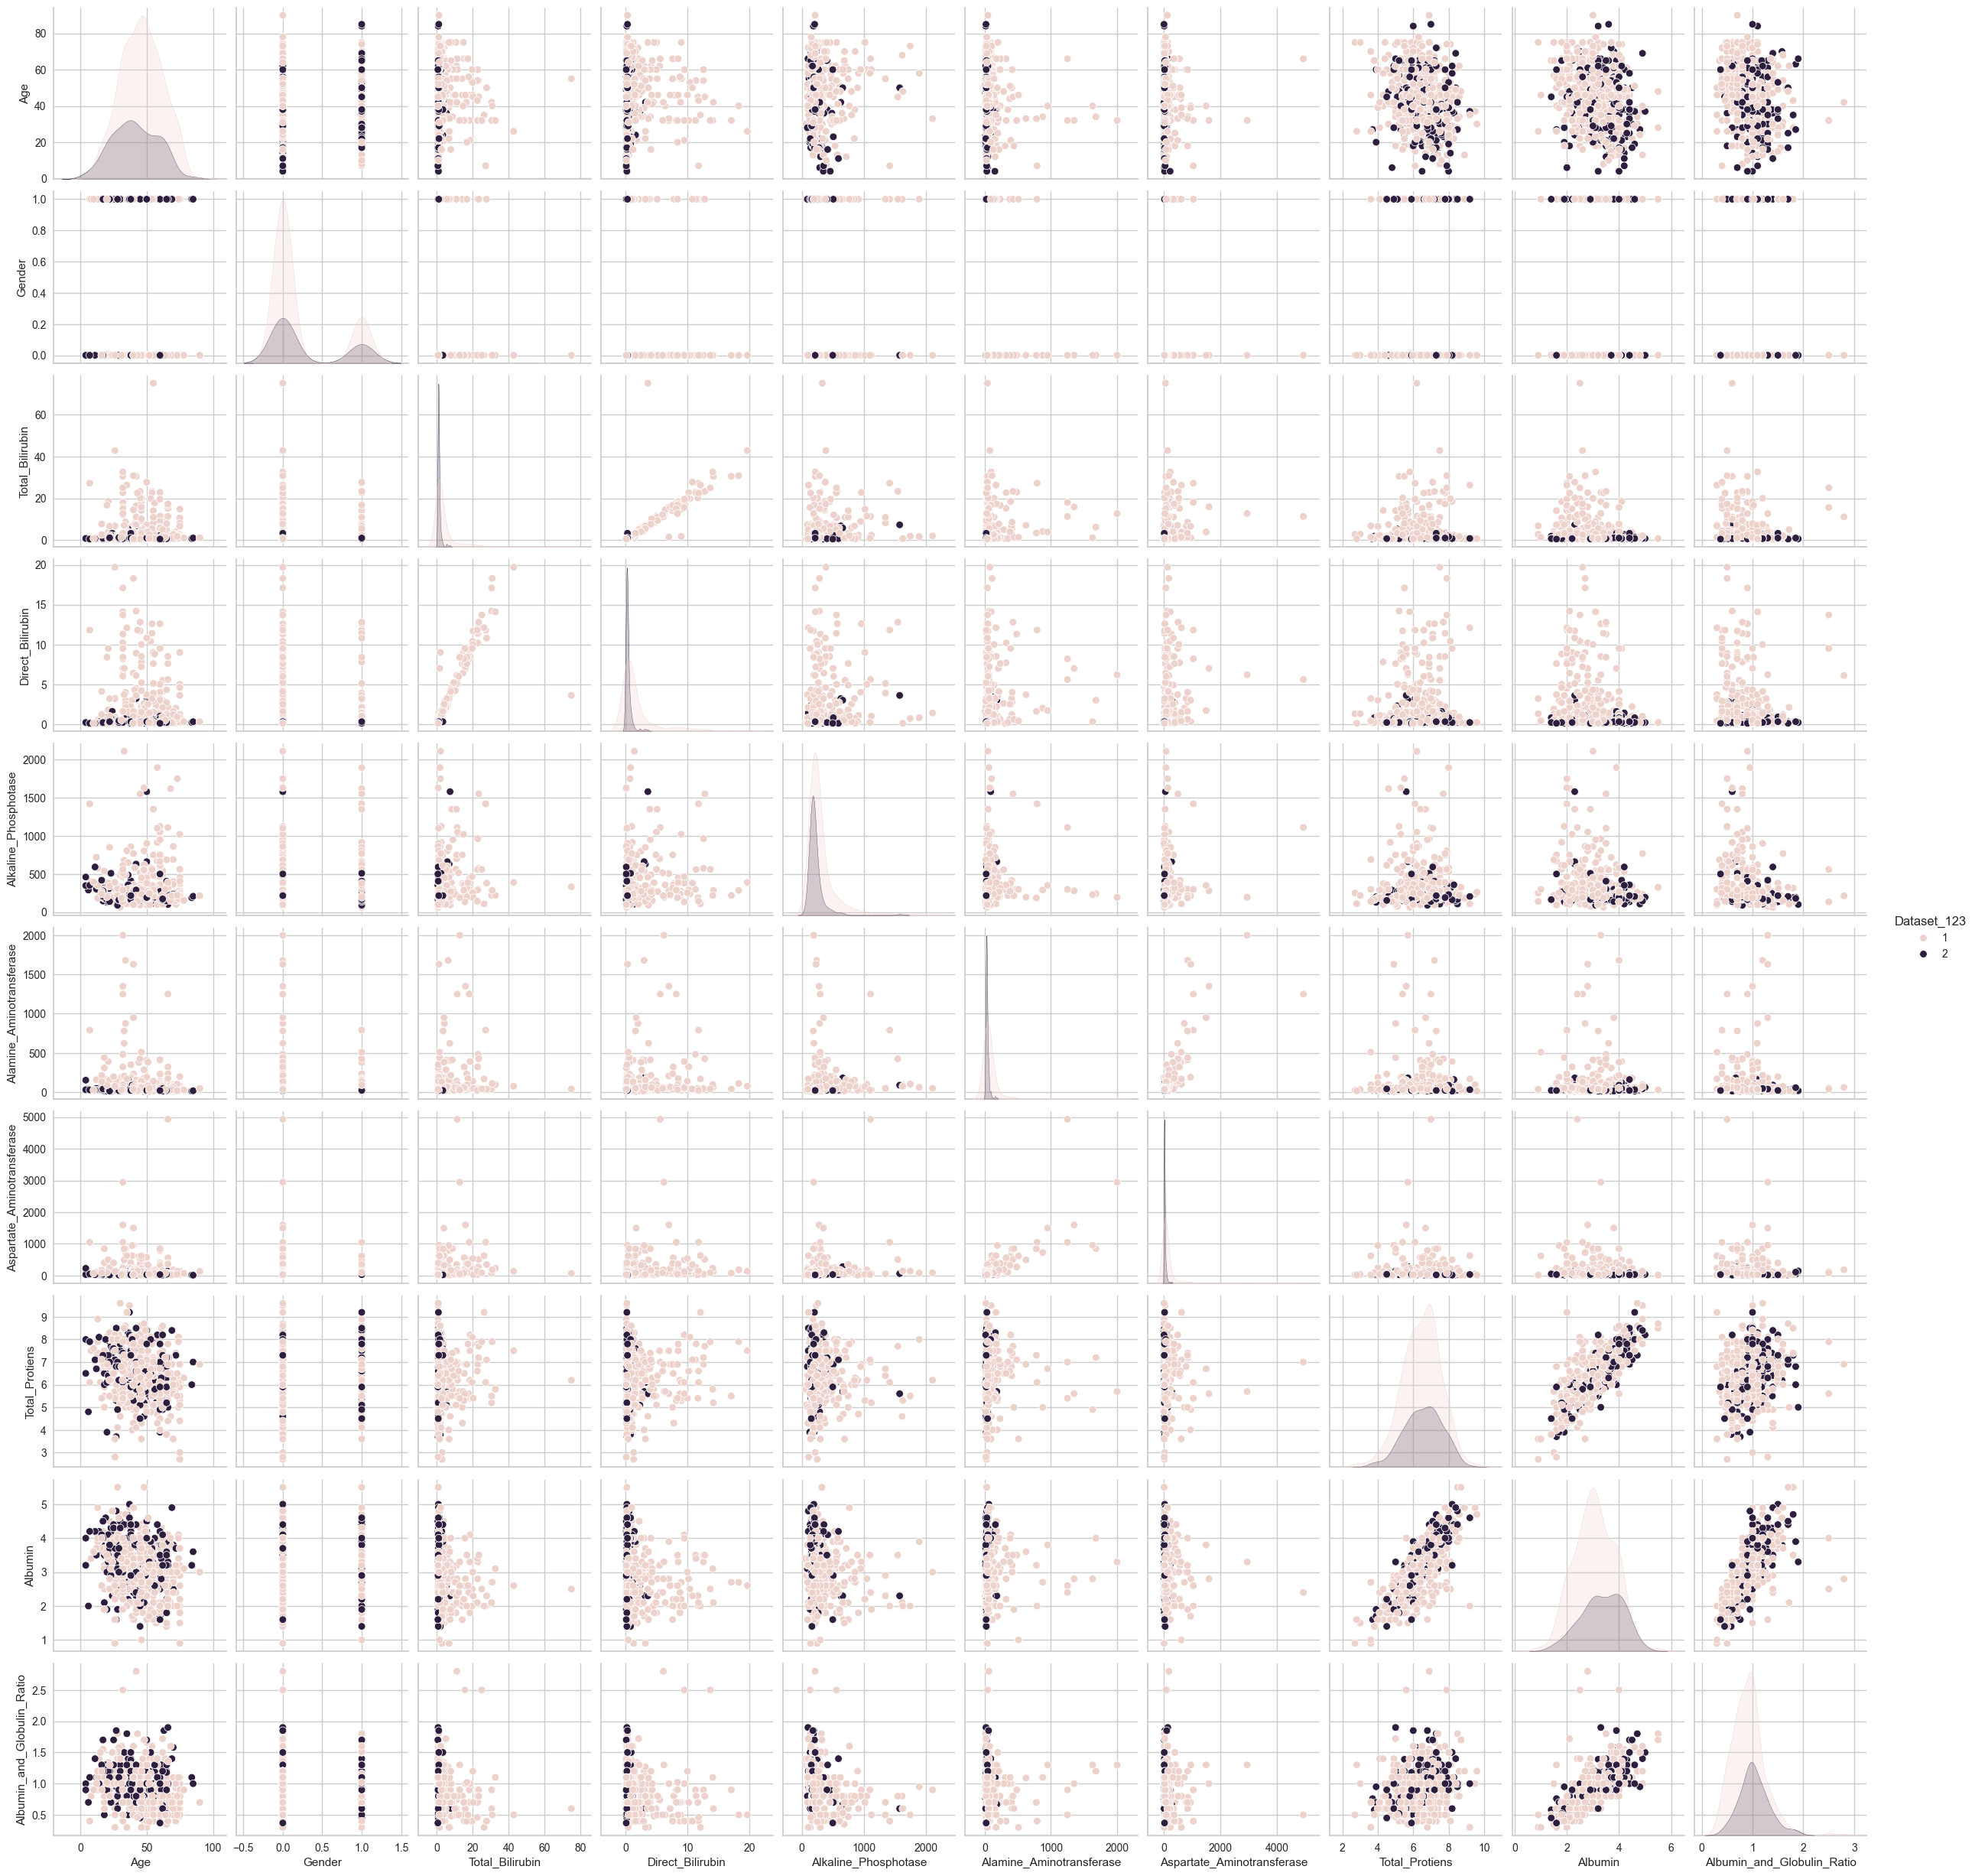

In [28]:
import seaborn as sns

sns.pairplot(df, hue='Dataset_123')
plt.show()

По данной диаграмме можно явно сказать, что заболеванием печени чаще всего болеют люди старше 30, а так же что при значения `Total_Protiens > 5` или `Albumin > 2` или `Albumin_and_Globulin_Ratio > 1.5` есть большая вероятность обнаружить болезнь печени. 

Аналогично предыдущей части была выполнена стандартизация данных, предварительно поделив данные на признаки - `X` и целевую переменную - `y`. 

In [29]:
y = pd.to_numeric(df['Dataset_123'])
X = df.drop('Dataset_123', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

Далее с помощью визуализации "методом плеча" было выбрано оптимальное количество кластеров - 4.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    int64  
 2   Total_Bilirubin             587 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        587 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    int64  
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  587 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 46.0 KB


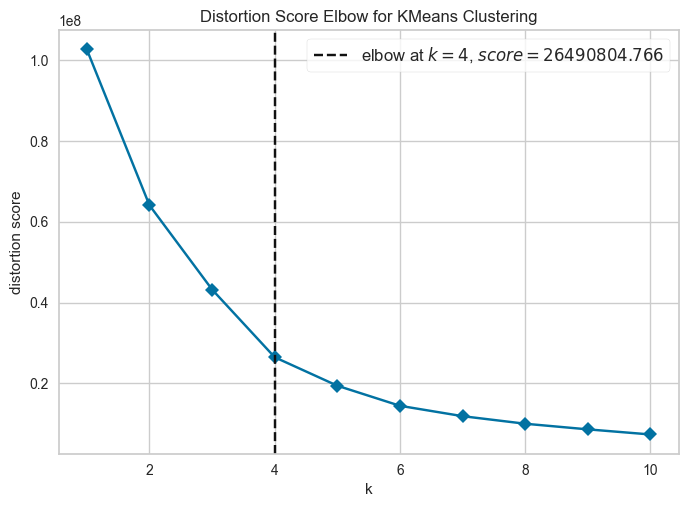

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

X.info()
visualizer = KElbowVisualizer(kmeans, k=(1,11), timings=False)
visualizer.fit(X)
visualizer.show()


cluster = kmeans.fit_predict(X)

Была выполнена кластеризация объектов методом `k-means` для подобранного параметра `n_clusters = 4`.

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X)
cluster

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Также были подсчитаны средние показатели по каждому признаку каждого кластера.

In [32]:
df['cluster'] = kmeans.labels_ 
df.groupby('cluster').mean() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_123
cluster,,,,,,,,,,,
0,44.378788,0.240530,2.921155,1.288636,236.187435,49.433712,66.244318,6.520076,3.187311,0.966720,1.314394
1,39.150000,0.150000,7.985000,3.715000,338.750000,733.200000,848.500000,6.095000,2.840000,0.858500,1.000000
2,52.162162,0.324324,5.464865,2.721622,1011.459459,85.216216,118.000000,6.191892,2.743243,0.755405,1.081081
3,49.000000,0.000000,12.000000,5.900000,652.000000,1625.000000,3937.500000,6.350000,2.850000,0.900000,1.000000


Исходя из данных можно сделать вывод, что некоторые группы содержат в среднем большие или меньшие признаки. Также встречаются группы, не содержащие какого-либо признака, например, группа 3 признак `Gender`.

Далее были вычислены метрики Силуэта и `AMI`. Метрика `AMI` (`Adjusted Mutual Information`) – оценка на основе взаимной информации, которая измеряет согласованность двух назначений, вычисляется с использованием функции энтропии (`adjusted_mutual_info_score`). Коэффициент силуэта показывает, насколько похож объект на другие объекты своего кластера. 

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = silhouette_score(X, cluster)
print("Качество кластеризации по метрике Cилуэта", score)

score = adjusted_mutual_info_score(y, cluster, average_method='arithmetic')
print("Качество кластеризации по метрике AMI" , score)

Качество кластеризации по метрике Cилуэта 0.7397073458344975
Качество кластеризации по метрике AMI 0.0394573506748191


Значение по метрике Cилуэта близко к 1, что свидетельствуют о том, что объекты в кластерах хорошо сгруппированы. Значение `AMI` крайне низкое, это указывает на то, что кластеризация не согласуется с каким-то истинным разделением

В конце была построена дендрограмма, которая позволяет анализировать иерархическую структуру данных и определять кластеры на разных уровнях иерархии. Для ее визуализации используется библиотека `scipy.cluster.hierarchy` и ее методы `dendrogram` и `linkage`. По оси у – кластерное расстояние, длина каждой ветви показывает, насколько далеко друг от друга находятся объединенные кластеры.

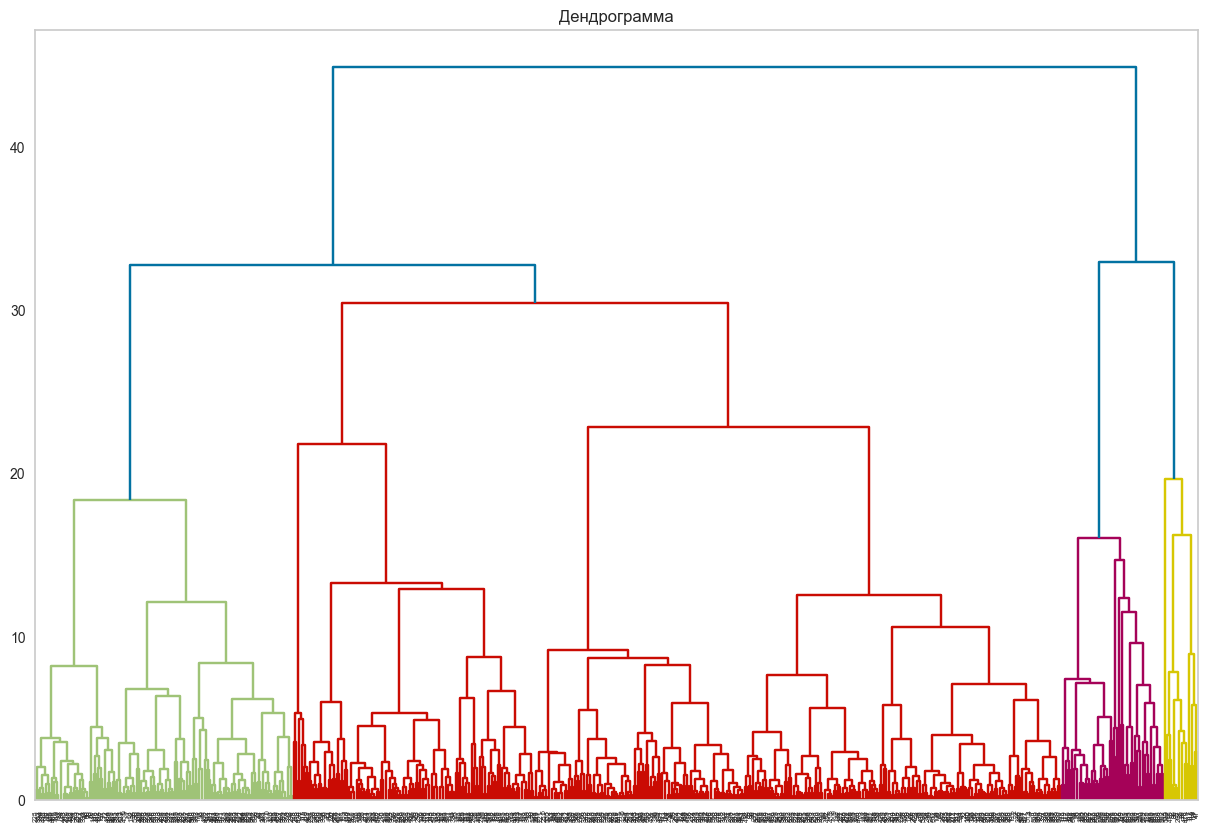

In [34]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()
plt.show()

По данной диаграмме нельзя точно сказать какое количество кластеров нужно использовать, но можно анализировать как объекты или кластеры объединяются в более крупные группы в процессе иерархической кластеризации.

### Дополнительное задание 3

Выполнить визуализацию. Выбрать два признака, построить график scatter, выделить кластеры разными цветами, отметить центры кластеров. Сделать выводы. Повторить ещё для одной пары других признаков.

Были выбраны два признака - `Total_Protiens` и `Age`, а дольше аналогично был сформирован график.

Text(0, 0.5, 'Age')

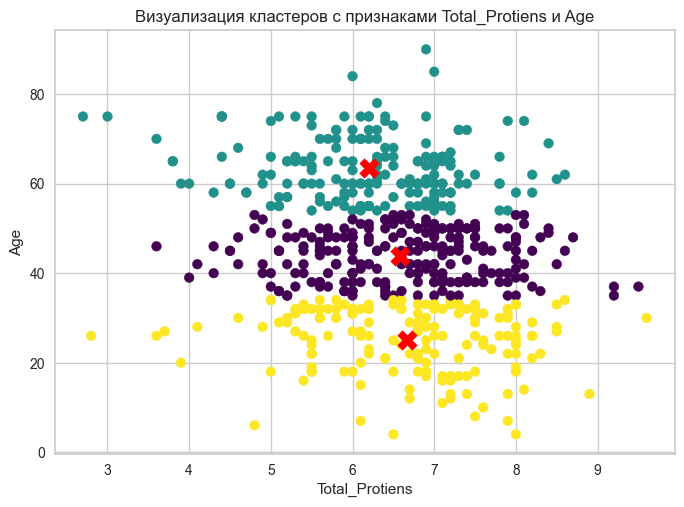

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X[['Total_Protiens', 'Age']])
cluster_label = kmeans.labels_
centers = kmeans.cluster_centers_ 

plt.scatter(X['Total_Protiens'], X['Age'], c=cluster_label, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров c признаками Total_Protiens и Age')
plt.xlabel('Total_Protiens')
plt.ylabel('Age')

Из данного графика видно как были поделены кластеры, можно заметить четкое разделение на группы по возрасту, что говорит о том, что возраст напрямую связан с наличием болезни.

Тоже самое было проделано для признаков ` Direct_Bilirubin` и `Total_Bilirubin` 

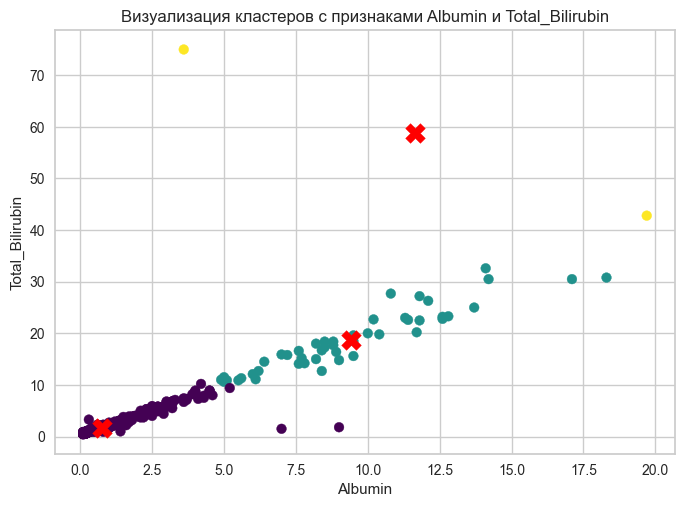

In [36]:
cluster = kmeans.fit_predict(X[['Direct_Bilirubin', 'Total_Bilirubin']])
cluster_label = kmeans.labels_
centers = kmeans.cluster_centers_ 

plt.scatter(X['Direct_Bilirubin'], X['Total_Bilirubin'], c=cluster_label, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров c признаками Albumin и Total_Bilirubin')
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.show()

Из данного графика видно, что `Direct_Bilirubin` и `Total_Bilirubin` линейно зависимы и группы формируются, разделяя линию пополам и выпадающие точки.

## Вывод

В ходе второй части анализа данных были проведены важные этапы предобработки и исследования. Начав с загрузки датасета и переименования столбцов для удобства, процесс включал в себя заполнение пропущенных значений, обработку дубликатов и приведение данных в один формат.

Затем выделена целевая переменная, основываясь на которой была построена матрица диаграмм рассеяния. Визуализация позволила выделить определенные закономерности, такие как более высокая вероятность заболевания у людей старше 30 лет или при определенных значениях белков и соотношения альбуминов и глобулинов.

Далее данные были стандартизированы, и с использованием метода локтя было выбрано оптимальное количество кластеров (в данном случае, 4). Процесс кластеризации и последующий анализ средних значений по каждому кластеру подчеркнули наличие групп с различными характеристиками.

Оценка качества кластеризации с использованием метрик силуэта и AMI также была проведена, выявив высокое качество силуэта, но низкую согласованность с истинным разделением.

В завершение была построена дендрограмма, которая, хотя не предоставляет конкретного числа кластеров, позволяет анализировать иерархическую структуру данных.

В целом, полученные результаты дополняют первую часть анализа данных, углубляя понимание особенностей датасета и выявляя взаимосвязи между признаками и вероятностью заболевания печени.